# Sentiment Analysis of Consumer Reviews for FMCG Company Products:
## Text Analytics Project using Topic modeling, word clouds and sentiment score

### for Colgate Palmolive: Colgate

## Import the Libraries

In [2]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the numpy library for numerical computations and array operations
import numpy as np
# Importing the matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importing the WordCloud class, STOPWORDS, ImageColorGenerator from the wordcloud module for generating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Importing the nltk library for natural language processing
import nltk
# Importing the re module for regular expression operations
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import libraries for topic modeling using LDA

In [3]:
import gensim
# Importing the corpora module from gensim for creating document-term matrices
from gensim import corpora
# for latent Dirichlet allocation (LDA) topic modeling
from gensim.models import LdaModel

## Import the Scraped Data


In [4]:
data = pd.read_csv('datasets/octane.csv')
data.head(10)

headline  \
0  This pen has waterproof ink 👍   
1                           Nice   
2                 Ya super sumth   
3                     Waterproof   
4                           Good   
5                   Nice product   
6                       nice one   
7                        Quality   
8                            YES   
9                           Nice   

                                              review              rating  
0  I love this product's quality! the body of the...  4.0 out of 5 stars  
1                          Handwriting is so perfect  4.0 out of 5 stars  
2                                   Yes all ways don  4.0 out of 5 stars  
3                                          Good pens  4.0 out of 5 stars  
4                                       Good quality  4.0 out of 5 stars  
5                                       Nice product  4.0 out of 5 stars  
6                        good one. my kids loved it.  5.0 out of 5 stars  
7                           Smooth and easy to write  5.0 out of 5 stars  
8                                               GOOD  5.0 out of 5 stars  
9                Was much appreciated by my students  4.0 out of 5 stars

In [5]:
data.isnull().sum()

headline     0
review      17
rating       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  711 non-null    object
 1   review    694 non-null    object
 2   rating    711 non-null    object
dtypes: object(3)
memory usage: 16.8+ KB


## Dropping rows which have null values

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 710
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  694 non-null    object
 1   review    694 non-null    object
 2   rating    694 non-null    object
dtypes: object(3)
memory usage: 21.7+ KB


## This method is for cleaning the data. That is stemming and removing stopwords 

In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

## Spiltting reviews to get keywords for our topic modeling

In [9]:
texts = data["review"]
split_text = [d.split() for d in texts]

In [10]:
dictionary = corpora.Dictionary(split_text)
# filter out words that occur in < 20 reviews, or > 80% of the reviews
dictionary.filter_extremes(no_below = 20, no_above = .8)

# creat corpus: pairing of word id and word frequency in each document

In [11]:
corpus = [dictionary.doc2bow(text) for text in split_text] 

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10, passes = 20)

In [13]:
### Latent Dirichlet Allocation algorithm for topic modeling

In [14]:
topics = lda_model.print_topics(num_words = 10)
# for topic in topics:  
#     print(topic)

## List of latent (hidden) topics and their top 11 keywords

In [15]:
for i, topic in lda_model.show_topics(formatted=False, num_words= 11):
    print('Topic: {} \nWords: {}'.format(i, [w[0] for w in topic]), end = "\n"+"-"*120+"\n")

Topic: 0 
Words: ['buy', 'best', 'pens', 'use', 'one', 'ink', 'neon', 'nice', 'pen', 'price', 'easy']
------------------------------------------------------------------------------------------------------------------------
Topic: 1 
Words: ['money', 'value', 'easy', 'pen', 'nice', 'body', 'writing', 'good', 'smooth', 'product', 'quality']
------------------------------------------------------------------------------------------------------------------------
Topic: 2 
Words: ['pen', 'writing', 'like', 'smooth', 'ink', 'neon', 'product', 'write', 'quality', 'gel', 'pens']
------------------------------------------------------------------------------------------------------------------------
Topic: 3 
Words: ['write', 'smooth', 'grip', 'easy', 'pens', 'ink', 'good', 'quality', 'neon', 'love', 'body']
------------------------------------------------------------------------------------------------------------------------
Topic: 4 
Words: ['pens', 'quality', 'good', 'love', 'writing', 'produ

## Analysis of the ratings

In [16]:
data['rating'] = data['rating'].str.split().str[0].astype(float)

In [17]:
data.head()

headline               review  rating
0  Nice product              awesome     4.0
1          Good                 good     4.0
2            Ok                 good     4.0
3  Money saving  money saving chance     4.0
4          Good      nothing dislike     4.0

In [18]:
ratings = data["rating"].value_counts()
numbers = ratings.index
labels = []
for i in numbers:
    labels.append(str(int(i))+ " star rating")

In [19]:
quantity = ratings.values

figure = px.pie(data, 
             values=quantity, 
             names=labels,
             title='Customer ratings out of 5',
             hole= 0.4)
figure.show()

## Interpetation of the distribution:
The customer ratings data shows that the majority of customers were highly satisfied, with a significant number of five-star ratings. However, there were also a notable number of customers who expressed average or below-average satisfaction levels. This indicates room for improvement to address customer concerns and enhance overall satisfaction

## WordCloud for the Reviews

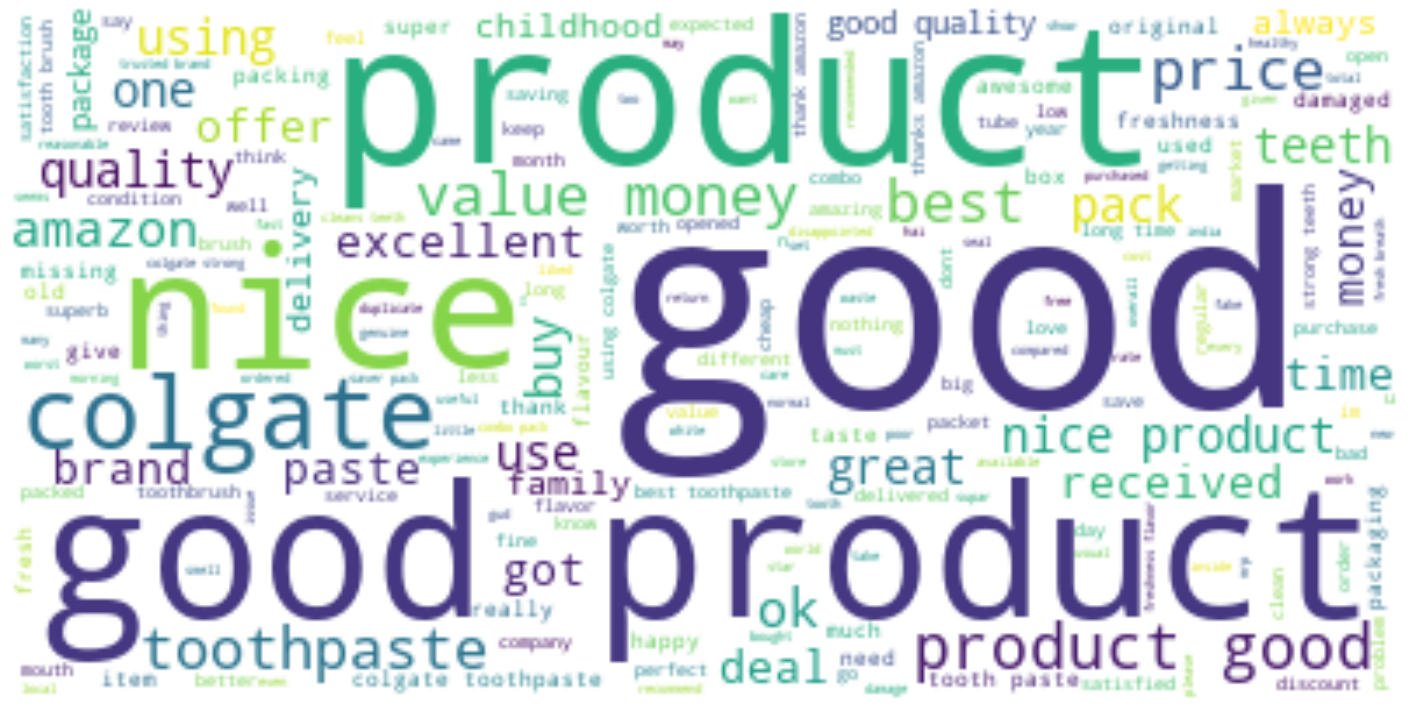

In [20]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## The above word cloud illustrates the keywords in the reviews
Note the presence of predominantly positive words

## Calculating the Sentiment Scores

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kvpai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
data.head()

review  Positive  Negative  Neutral
0              awesome     1.000       0.0    0.000
1                 good     1.000       0.0    0.000
2                 good     1.000       0.0    0.000
3  money saving chance     0.500       0.0    0.500
4      nothing dislike     0.686       0.0    0.314

## Interpretation of the polarity scores:
The interpretation of the polarity/sentiment scores reveals the overall sentiment expressed in the customer reviews, ranging from positive to negative.

In [23]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Overall Positive")
    elif (b>a) and (b>c):
        print("Overall Negative")
    else:
        print("Overall Neutral")
sentiment_score(x, y, z)

Overall Positive


In [24]:
sentiment_percent = [['Positive', round(x/len(data)*100, 3)],
                     ['Negative', round(y/len(data)*100, 3)],
                     ['Neurtal', round(z/len(data)*100, 3)]]
sentiment_res = pd.DataFrame(sentiment_percent, columns=['Sentiment', 'Percentage'])
sentiment_res

Sentiment  Percentage
0  Positive      61.080
1  Negative       3.397
2   Neurtal      35.067

## Create a new dataframe
create a new dataframe with customers who had a bad experience with this product.

In [25]:
data_neg = data[(data['Negative']>data['Positive']) & (data['Negative']>data['Neutral'])]

In [26]:
data_neg.head(30)

review  Positive  Negative  \
83                              product  shopkeeper bad     0.000     0.636   
117                         worst smell seems duplicate     0.000     0.577   
152                                  amazon india fraud     0.262     0.585   
186                        verification process bad otp     0.000     0.538   
518                       toothpaste pressure available     0.000     0.524   
530                                         worst money     0.000     0.804   
572                good  totally disappointed packaging     0.350     0.409   
584                                 product good damage     0.408     0.451   
673                                                 bad     0.000     1.000   
681                                     packing damaged     0.000     0.744   
771                              fake duplicate product     0.000     0.608   
902                             worst experience buying     0.000     0.672   
943                                            cost low     0.000     0.677   
988                        brush hard low quality brush     0.000     0.538   
1020                       fake toothpasteপুরোপুরি নকল।     0.000     0.608   
1054  opened package box seal broken unhygienic cond...     0.000     0.508   
1086                                          low price     0.000     0.677   
1110                                      mrp  charged      0.000     0.643   
1150                               got damaged products     0.000     0.592   
1151      one tube paste black rotten shame colgate👎👎👎👎     0.000     0.561   
1166                          poor quality take product     0.000     0.508   
1167                                                bad     0.000     1.000   
1236                                       poor quality     0.000     0.756   
1242               missing   recieved disappointed time     0.000     0.726   
1253                       item missing package damaged     0.000     0.718   
1261                       missed product got empty box     0.000     0.571   
1268                                       bad products     0.000     0.778   
1306                                            damaged     0.000     1.000   
1312                   shampoo ruined packing materials     0.000     0.508   
1313                                                sad     0.000     1.000   

      Neutral  
83      0.364  
117     0.423  
152     0.154  
186     0.462  
518     0.476  
530     0.196  
572     0.241  
584     0.141  
673     0.000  
681     0.256  
771     0.392  
902     0.328  
943     0.323  
988     0.462  
1020    0.392  
1054    0.492  
1086    0.323  
1110    0.357  
1150    0.408  
1151    0.439  
1166    0.492  
1167    0.000  
1236    0.244  
1242    0.274  
1253    0.282  
1261    0.429  
1268    0.222  
1306    0.000  
1312    0.492  
1313    0.000

create a new dataframe with customers who had a good experience with this product.

In [27]:
data_pos = data[(data['Positive']>data['Negative']) & (data['Positive']>data['Neutral'])]
data_pos.head()

review  Positive  Negative  Neutral
0          awesome     1.000       0.0    0.000
1             good     1.000       0.0    0.000
2             good     1.000       0.0    0.000
4  nothing dislike     0.686       0.0    0.314
7             nice     1.000       0.0    0.000

## Word Cloud: Negative Sentiments in Customer Reviews
This word cloud is created using words extracted from customer reviews with negative sentiment, providing a visual representation of the frequently occurring negative words and phrases. 

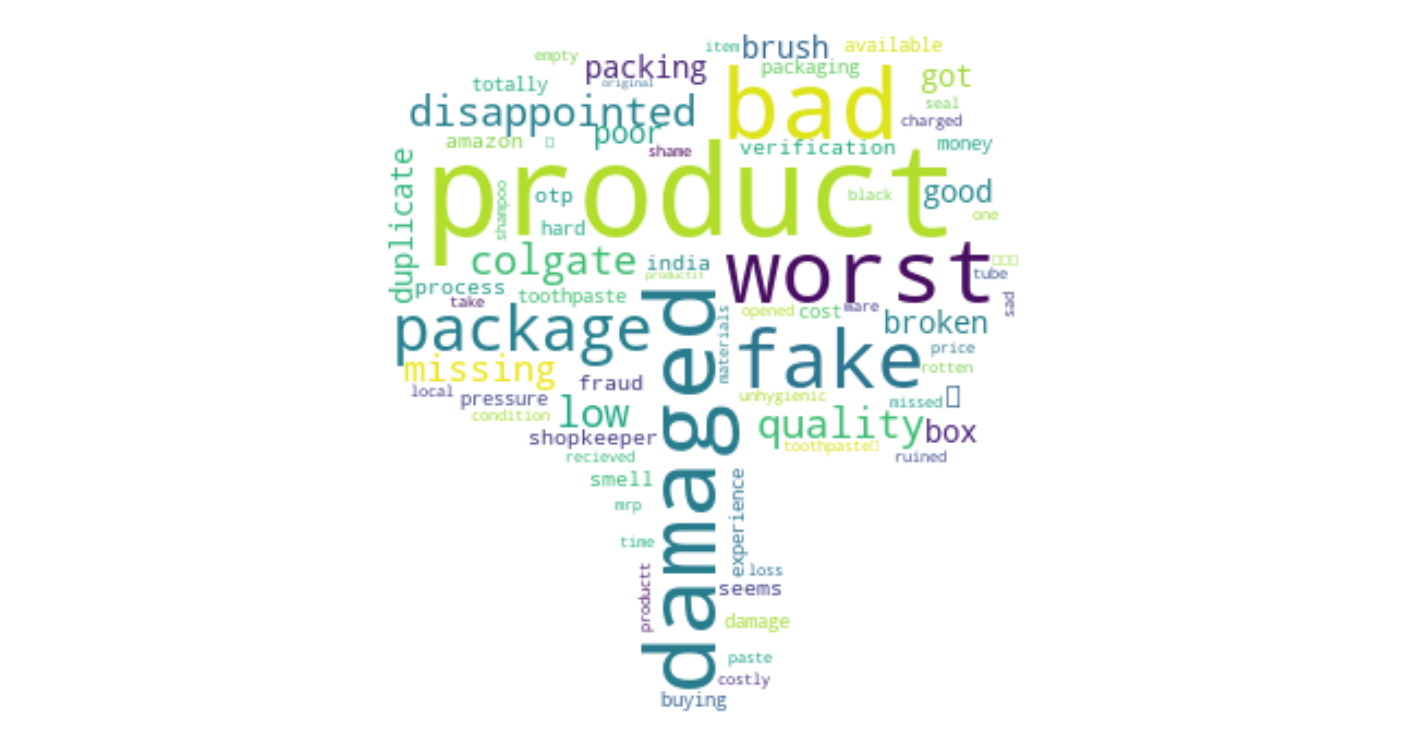

In [29]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
mask = np.array(Image.open("assets/thumbs-down.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words=250).generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud: Positive Sentiments in Customer Reviews
This word cloud is generated by extracting words from customer reviews with positive sentiment, offering a visual representation of the frequently occurring positive words and phrases.. 

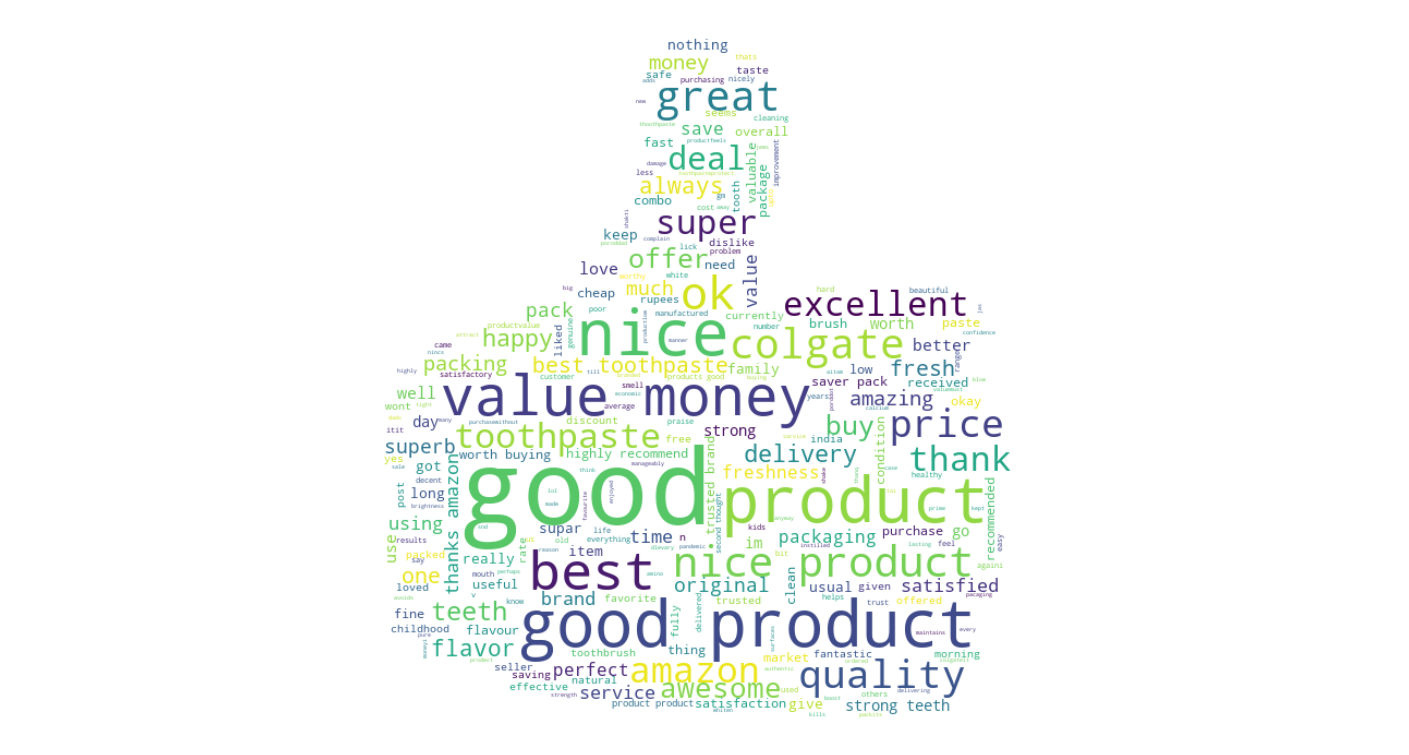

In [28]:
text = " ".join(i for i in data_pos.review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("thumbs-up.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=250, mask=mask).generate(text)
plt.figure(figsize=(25,25))
# plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In conclusion, this Python notebook focused on analyzing customer ratings and sentiments. The data provided valuable insights into customer satisfaction levels, with a majority of customers giving positive ratings. The word cloud visualizations further highlighted the predominant positive or negative sentiments expressed in customer reviews. By understanding the sentiment polarity and analyzing the frequently occurring words, businesses can gain deeper insights into customer experiences and identify areas for improvement. This analysis serves as a valuable tool for enhancing customer satisfaction, making data-driven decisions, and refining products or services based on customer feedback.
